In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import ast
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import IsolationForest

In [50]:
# Читаем данные в датафреймы
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

In [51]:
train.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


In [52]:
test.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
0,0,matematika,Репетитор по математике Тихонова Наталья Бори...,"['Школьная программа', 'Подготовка к ЕГЭ', 'Ан...",4,13,Дистанционное убучение по Skype с прим...,NaN,Петрозаводский государственный университет,"Год окончания: 1981, Факультет: физико-матема...",...,NaN,Частный преподаватель,26 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,1,matematika,Репетитор по математике Худайбердина Милана Р...,"['Школьная программа', 'Математический анализ'...",0,0,Буду рада помочь в освоении дисциплин ...,NaN,"Национальный исследовательский университет ""В...","Год окончания: 2022, Факультет: Московский ин...",...,NaN,Студент,4 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,2,matematika,Репетитор по математике Епихина Елена Вячесла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0,0,Преподаватель высшей квалификационный ...,Репетитор не предоставил информаци...,"Тамбовский ордена ""Знак Почёта"" государственн...","Год окончания: 1987, Факультет: Математика, С...",...,NaN,"Университетский преподаватель, Школьный препо...",36 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."
3,3,matematika,Репетитор по математике Касаткин Денис Евгень...,"['Школьная программа', 'Подготовка к ОГЭ', 'Hi...",4,11,"Объясняю ровно столько, сколько надо. ...",NaN,Тюменский государственный университет,"Год окончания: 2022, Факультет: факультет меж...",...,NaN,Студент,3 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,4,informatika,Репетитор по информатике Логвинов Артём Алекса...,['Подготовка к ЕГЭ'],0,0,"Подготовлю к ЕГЭ, уроки через любую уд...",Репетитор не предоставил информаци...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Программная и...",...,NaN,Студент,1 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."


In [53]:
train.shape

(4548, 28)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


In [55]:
train.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)

In [56]:
train.drop('ФИО', axis=1, inplace=True)
test.drop('ФИО', axis=1, inplace=True)

In [57]:
# Заполним пропуски в текстах пустыми строками (например, description, experience_desc)
text_cols = ['description', 'experience_desc']
for col in text_cols:
    train[col] = train[col].fillna('')
    test[col] = test[col].fillna('')


In [58]:
# Заполним пропуски в числовом рейтинге нулями
train['tutor_rating'] = train['tutor_rating'].fillna(0)
test['tutor_rating'] = test['tutor_rating'].fillna(0)

In [59]:
train['предмет'].value_counts()

предмет
matematika     3685
informatika     863
Name: count, dtype: int64

In [60]:
# Инициализация алгоритма кодировщика
one_hot_encoder = preprocessing.OneHotEncoder()

# Обучение алгоритма кодировщика
one_hot_encoder.fit(train['предмет'].values.reshape(-1, 1))

# Применение модели кодировщика
x_new = one_hot_encoder.transform(train['предмет'].values.reshape(-1, 1)).toarray()
x_test_new = one_hot_encoder.transform(test['предмет'].values.reshape(-1, 1)).toarray()

# Получение названий новых столбцов
encoded_columns = one_hot_encoder.get_feature_names_out(['предмет'])

# Преобразование в DataFrame для удобства
encoded_df = pd.DataFrame(x_new, columns=encoded_columns)
encoded_df_test = pd.DataFrame(x_test_new, columns=encoded_columns)

# Объединение с исходным DataFrame
train = pd.concat([train, encoded_df], axis=1)
test = pd.concat([test, encoded_df_test], axis=1)

# Удаление оригинального столбца
train.drop(columns=['предмет'], inplace=True)
test.drop(columns=['предмет'], inplace=True)

train.head()

,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,...,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price,предмет_informatika,предмет_matematika
0,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,0.0,1.0
1,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,0.0,1.0
2,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Российская таможенная академия,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333,1.0,0.0
3,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667,0.0,1.0
4,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,0.0,1.0


In [61]:
train['tutor_head_tags'].value_counts()

tutor_head_tags
['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ']                                                                                                                                                     1654
['Школьная программа', 'Подготовка к ОГЭ']                                                                                                                                                                          815
['Школьная программа']                                                                                                                                                                                              482
['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ', 'Подготовка к олимпиадам']                                                                                                                           334
['Подготовка к ЕГЭ', 'Подготовка к ОГЭ']                                                                                

In [62]:
# Преобразование строки в список
train['tutor_head_tags'] = train['tutor_head_tags'].apply(lambda s: list(ast.literal_eval(s)))
test['tutor_head_tags'] = test['tutor_head_tags'].apply(lambda s: list(ast.literal_eval(s)))


mlb = preprocessing.MultiLabelBinarizer()

# Обучение 
mlb.fit(train['tutor_head_tags'])

# Применение MultiLabelBinarizer к колонке 'tutor_head_tags'
tags_encoded = mlb.transform(train['tutor_head_tags'])
tags_encoded_test = mlb.transform(test['tutor_head_tags'])

# Создание нового DataFrame с закодированными тегами
tags_df = pd.DataFrame(tags_encoded, columns=mlb.classes_)
tags_df_test = pd.DataFrame(tags_encoded_test, columns=mlb.classes_)

# Соединение с исходным DataFrame
train = pd.concat([train, tags_df], axis=1)
test = pd.concat([test, tags_df_test], axis=1)

# Удаление исходного столбца
train.drop('tutor_head_tags', axis=1, inplace=True)
test.drop('tutor_head_tags', axis=1, inplace=True)

In [63]:
#адаптируем данные
train['tutor_rating'] = train['tutor_rating'].fillna(0)
test['tutor_rating'] = test['tutor_rating'].fillna(0)

In [64]:
train['description'].describe()

count                                                  4548
unique                                                 2766
top               Репетитор не предоставил о себе дополн...
freq                                                   1123
Name: description, dtype: object

In [65]:
# Функция для конвертации описания в числовой формат
def description_to_number(description):
    """Преобразует текстовое описание в бинарный флаг (0 или 1).
    
    Возвращает:
        0 - если описание отсутствует или начинается с фразы о непредоставлении информации
        1 - если описание имеется
    """
    if pd.isna(description) or str(description).lstrip().startswith('Репетитор не предоставил'):
        return 0
    return 1

# Применяем преобразование к данным
train['description'] = train['description'].apply(description_to_number)
test['description'] = test['description'].apply(description_to_number)

In [66]:
train['experience_desc'].describe()


count     4548
unique     840
top           
freq      2377
Name: experience_desc, dtype: object

In [67]:
train['experience_desc'] = train['experience_desc'].map(description_to_number)
test['experience_desc'] = test['experience_desc'].map(description_to_number)

In [68]:
# Определяем колонки, связанные с образованием
education_columns = ['Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6', 'Desc_Education_1', 'Desc_Education_2', 'Desc_Education_3', 'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6',
                     'Ученая степень 1', 'Ученая степень 2', 'Ученое звание 1', 'Ученое звание 2']

train[education_columns] = train[education_columns].map(description_to_number)
test[education_columns] = test[education_columns].map(description_to_number)

In [69]:
train['status'].value_counts()

status
Частный преподаватель                                                         2345
Студент                                                                       1288
Школьный преподаватель                                                         558
Университетский преподаватель                                                  129
Частный преподаватель, Студент                                                  92
Университетский преподаватель, Школьный преподаватель                           47
Аспирант или ординатор очной формы обучения                                     45
Аспирант или ординатор очной формы обучения, Частный преподаватель              15
Университетский преподаватель, Аспирант или ординатор очной формы обучения      13
Школьный преподаватель, Аспирант или ординатор очной формы обучения              3
Name: count, dtype: int64

In [70]:
train['status'].str.get_dummies(sep=',')
train.drop('status', axis=1, inplace=True)

test['status'].str.get_dummies(sep=',')
test.drop('status', axis=1, inplace=True)

In [71]:
train.head()

,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,...,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа
0,5.0,2,0,1,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,4.0,7,0,1,1,1,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0.0,0,1,1,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,0,1
3,4.0,19,1,1,1,1,0,0,0,0,...,1,0,1,1,1,0,0,1,0,1
4,0.0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [72]:
train['experience'].value_counts()

experience
4 года      475
5 лет       419
6 лет       411
3 года      367
2 года      299
7 лет       285
8 лет       243
9 лет       220
10 лет      192
1 год       168
11 лет      132
14 лет      127
12 лет      116
13 лет      108
15 лет       82
20 лет       62
16 лет       58
18 лет       52
27 лет       51
29 лет       50
25 лет       49
24 года      44
28 лет       42
22 года      37
21 год       36
17 лет       35
26 лет       31
19 лет       30
30 лет       28
33 года      26
23 года      25
34 года      21
37 лет       20
31 год       20
32 года      20
38 лет       18
45 лет       17
35 лет       13
39 лет       11
44 года      11
36 лет       11
40 лет       11
41 год       11
42 года      10
43 года       9
47 лет        5
46 лет        4
48 лет        3
53 года       2
55 лет        1
68 лет        1
52 года       1
50 лет        1
51 год        1
54 года       1
Name: count, dtype: int64

In [73]:
# Оставим только числа в колонке
train['experience'] = train['experience'].str.replace(r"[^\d\.]", "", regex=True)
test['experience'] = test['experience'].str.replace(r"[^\d\.]", "", regex=True)
# преобразуем колонку в числовой формат
train['experience'] = train['experience'].astype('float64')
test['experience'] = test['experience'].astype('float64')

In [74]:
train['experience'] = train['experience'].fillna(0)
test['experience'] = test['experience'].fillna(0)

In [75]:
train['categories'].value_counts()

categories
['Школьники с 5 по 9 класс', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты']                                                                                                                                                                                                                                                                                                                                                                                                                                                                        1256
['Школьники с 5 по 9 класс']                                                                                                                                                                                                                                                                                                                                                                                                            

In [76]:
# Преобразование строки в список
train['categories'] = train['categories'].apply(lambda s: list(ast.literal_eval(s)))
test['categories'] = test['categories'].apply(lambda s: list(ast.literal_eval(s)))

# Инициализация MultiLabelBinarizer
mlb = preprocessing.MultiLabelBinarizer()

# Применение MultiLabelBinarizer к колонке 'categories'
mlb.fit(train['categories'])
categories_encoded = mlb.transform(train['categories'])
categories_encoded_test = mlb.transform(test['categories'])

# Создание нового DataFrame с закодированными категориями
categories_df = pd.DataFrame(categories_encoded, columns=mlb.classes_)
categories_df_test = pd.DataFrame(categories_encoded_test, columns=mlb.classes_)

# Соединение с исходным DataFrame
train = pd.concat([train, categories_df], axis=1)
test = pd.concat([test, categories_df_test], axis=1)

# удаление исходных столбцов
train.drop('categories', axis=1, inplace=True)
test.drop('categories', axis=1, inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Студенты университетов группа'] will be ignored
  warnings.warn(


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 60 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   tutor_rating                                                                     4548 non-null   float64
 1   tutor_reviews                                                                    4548 non-null   int64  
 2   description                                                                      4548 non-null   int64  
 3   experience_desc                                                                  4548 non-null   int64  
 4   Education_1                                                                      4548 non-null   int64  
 5   Desc_Education_1                                                                 4548 non-null   int64  
 6   Educatio

Теперь датафрейм содержит только числовые признаки без пропущенных значений. Однако масштабы данных в разных столбцах различаются. Чтобы привести их к единому диапазону, выполним нормализацию для признаков, где максимальное значение превышает 1.

In [78]:
mmsc = preprocessing.MinMaxScaler()

df_for_scale = train.drop('mean_price', axis=1)

# Шаг 1: Отбираем колонки, где максимальное значение > 1
selected_columns = df_for_scale.columns[df_for_scale.max() > 1]

# Шаг 2: Создаем копию выбранных колонок для нормализации
df_to_scale = df_for_scale[selected_columns].copy()
df_to_scale_test = test[selected_columns].copy()


mmsc.fit(df_to_scale)

# Шаг 3: Нормализуем выбранные колонки
df_scaled = pd.DataFrame(mmsc.transform(df_to_scale), 
                         columns=selected_columns,
                         index=train.index)

df_scaled_test = pd.DataFrame(mmsc.transform(df_to_scale_test), 
                         columns=selected_columns,
                         index=test.index)

# Шаг 4: Объединяем с остальными колонками (необязательно)
train[selected_columns] = df_scaled
test[selected_columns] = df_scaled_test


In [79]:
train.describe()

,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,...,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа
count,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,...,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000
mean,0.330079,0.019665,0.753078,0.817062,0.983509,0.983289,0.171724,0.170844,0.023307,0.023087,...,0.001539,0.312885,0.007256,0.001099,0.694811,0.049472,0.023307,0.933817,0.047493,0.019129
std,0.444106,0.056032,0.431268,0.386658,0.127367,0.128199,0.377182,0.376414,0.150893,0.150197,...,0.039206,0.463719,0.084882,0.033142,0.460538,0.216876,0.150893,0.248629,0.212715,0.136994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.800000,0.013158,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ПРОВЕРИМ ВЫБРОСЫ

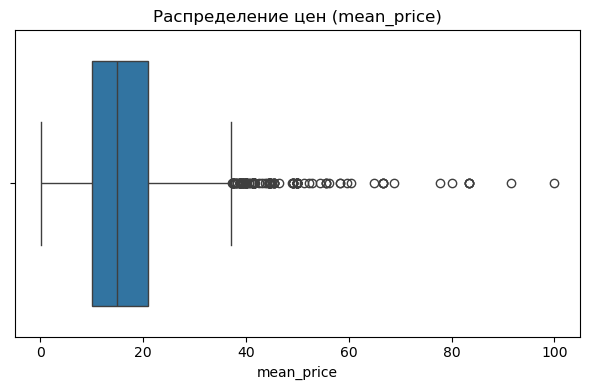

In [80]:
plt.figure(figsize=(6, 4))  
boxplot = sns.boxplot(data=train, x='mean_price')
boxplot.set_title('Распределение цен (mean_price)')
plt.tight_layout()  
plt.show()

In [81]:
def detect_outliers_iqr(data, feature, left=3, right=3):
    
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    
    outliers_mask = (x < lower_bound) | (x > upper_bound)
    outliers = data[outliers_mask]
    cleaned = data[~outliers_mask]
    
    return outliers, cleaned
# Обнаружение и обработка выбросов
outliers, cleaned_data = detect_outliers_iqr(train, 'mean_price')

print(f'Результирующее число записей: {len(cleaned_data)}')

Результирующее число записей: 4525


In [82]:
X = cleaned_data.drop(columns=['mean_price'])
Y = cleaned_data['mean_price']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (3620, 59), (3620,)
Test dataset size: (905, 59), (905,)


In [84]:
# Создаем модель линейной регрессии
lig_reg = LinearRegression()

lig_reg.fit(X_train, y_train)

y_pred = lig_reg.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 19334083475.53416
Mean Squared Error: 2.327192904597093e+23
R2 score: -2.577738573685165e+21


In [88]:
# Создаем модель SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, y_train)

# Предсказания
y_pred = svr_rbf.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 6.3971950780697995
Mean Squared Error: 81.39700262655305
R2 score: 0.09839793238307148


In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'epsilon': [0.01, 0.1, 0.5]
}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5],
                         'gamma': ['scale', 'auto', 0.01, 0.1]})

In [92]:
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)

# Оценка лучшей модели
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

Лучшие параметры: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale'}
R2: 0.1445919552296986
MAE: 6.338973332779055


SVR крайне чувствителен к масштабу данных. Без нормализации признаки с большими значениями будут доминировать.

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Повторный подбор параметров на масштабированных данных
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5],
                         'gamma': ['scale', 'auto', 0.01, 0.1]})

In [94]:
param_grid_extended = {
    'C': [5, 10, 15, 20],  # Окрестность найденного оптимального C
    'gamma': ['scale', 'auto', 0.001, 0.005],  # Более детальные значения
    'epsilon': [0.005, 0.01, 0.015]  # Узкий диапазон вокруг лучшего значения
}

In [95]:
# Инициализация и обучение
grid_search_ext = GridSearchCV(
    SVR(kernel='rbf'),
    param_grid_extended,
    cv=5,
    scoring='r2',  # Можно добажать 'neg_mean_absolute_error'
    n_jobs=-1  # Использовать все ядра процессора
)
grid_search_ext.fit(X_train_scaled, y_train)  # Обязательно используйте масштабированные данные!

# Вывод информации
print("Лучшие параметры:", grid_search_ext.best_params_)
print("Лучший R2 на кросс-валидации:", grid_search_ext.best_score_)

# Оценка на тестовых данных
best_svr = grid_search_ext.best_estimator_
y_pred = best_svr.predict(X_test_scaled)

print("\nТестовые метрики:")
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Лучшие параметры: {'C': 15, 'epsilon': 0.015, 'gamma': 'scale'}
Лучший R2 на кросс-валидации: 0.16880079312549867

Тестовые метрики:
R2: 0.14294846496356572
MAE: 6.288849813763937
MSE: 77.37496236320978


In [103]:
test_scaled = scaler.transform(test)  # Используем тот же scaler, что и для train


test_df = pd.DataFrame(test_scaled, columns=test.columns)


y_test_pred = grid_search_ext.predict(test.values)

finaldf = pd.DataFrame({
    'index': test.index,  # Сохраняем исходные индексы
    'mean_price': y_test_pred
})

finaldf.to_csv('submission9.csv', index=False)

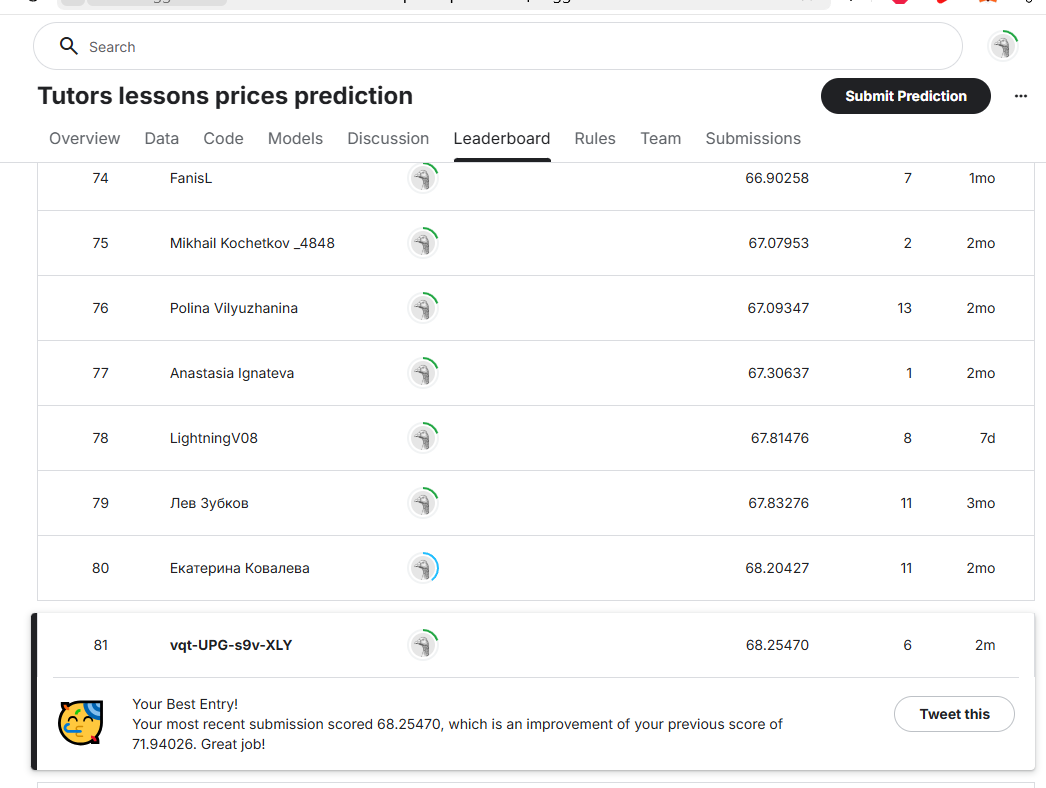

In [105]:
from IPython.display import Image, display

# Отображаем изображение из файла
display(Image(filename=r'C:\Users\NikLeo\skillfa\dz4.png'))

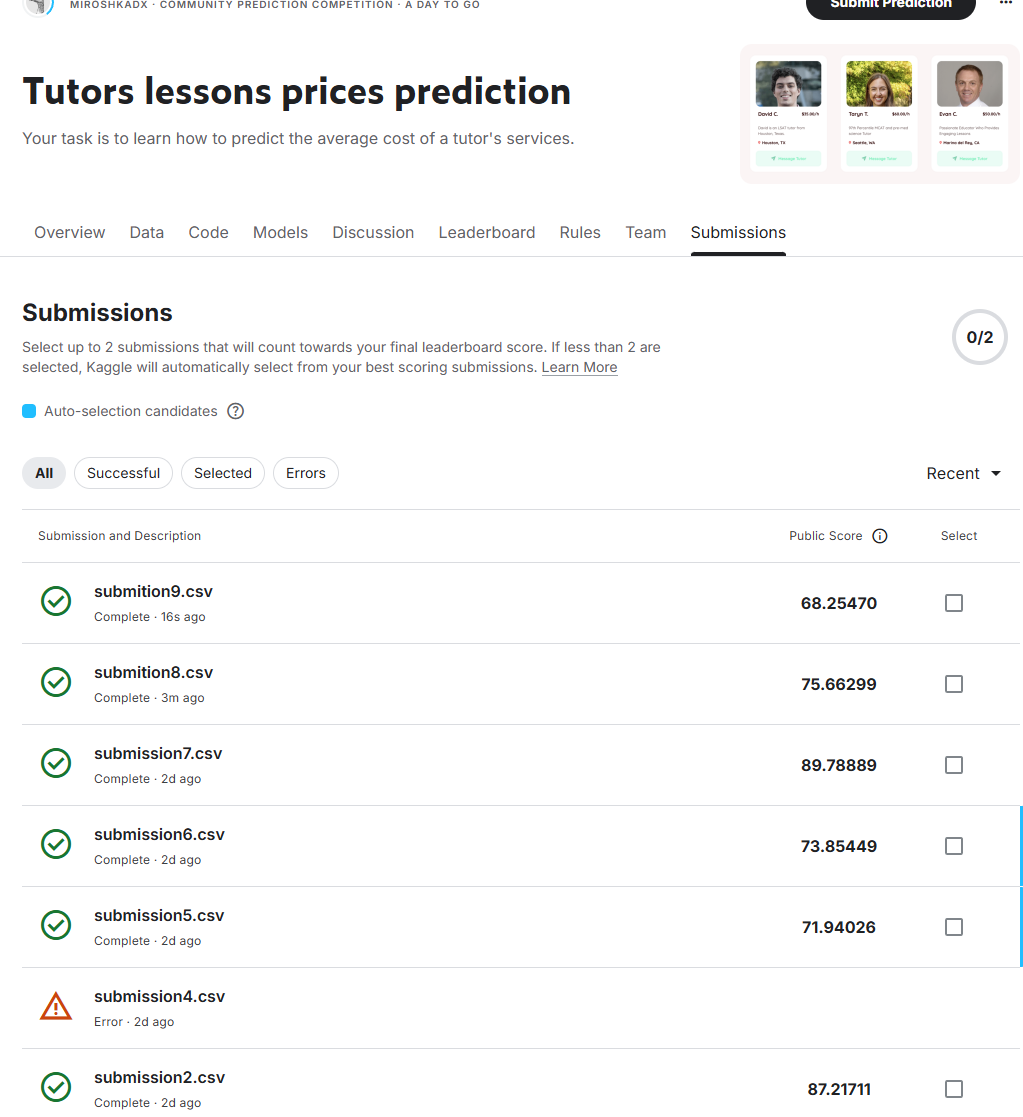

In [106]:
display(Image(filename=r'C:\Users\NikLeo\skillfa\dz4.1.png'))